In [2]:
import pandas as pd

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Filter data for 2016 to 2019 in both datasets
tumour_data = tumour_data[(tumour_data['DIAGNOSISDATEBEST'] >= '2016-01-01') & (tumour_data['DIAGNOSISDATEBEST'] <= '2019-12-31')]
prescription_data = prescription_data[(prescription_data['APPTDATE'] >= '2016-01-01') & (prescription_data['APPTDATE'] <= '2019-12-31')]

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')




print(merged_data.head())


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\1261250523.py:4: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\1261250523.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')


   TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST SITE_ICD10_O2_3CHAR  \
0  11640280       1   10000008        2016-08-17                 C44   
1  11640280       1   10000008        2016-08-17                 C44   
2  11640280       1   10000008        2016-08-17                 C44   
3  11640280       1   10000008        2016-08-17                 C44   
4  11640280       1   10000008        2016-08-17                 C44   

  SITE_ICD10_O2 SITE_ICD10R4_O2_3CHAR_FROM2013 SITE_ICD10R4_O2_FROM2013  \
0          C449                            C44                     C449   
1          C449                            C44                     C449   
2          C449                            C44                     C449   
3          C449                            C44                     C449   
4          C449                            C44                     C449   

  SITE_ICDO3REV2011 SITE_ICDO3REV2011_3CHAR  ...  RTPRESCRIBEDDOSE  \
0              C449                     C44  .

In [4]:
# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Drop duplicate rows based on 'PATIENTID'
merged_data = merged_data.drop_duplicates(subset='PATIENTID')

# Fill NaN or null values with 0
merged_data = merged_data.fillna(0)

# Sort by 'PATIENTID' in ascending order
merged_data = merged_data.sort_values(by='PATIENTID')

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = merged_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')


print(result)

    RTTREATMENTMODALITY LATERALITY   COUNT
0                   0.0          9    4499
1                   0.0          B      85
2                   0.0          L    2360
3                   0.0          M      54
4                   0.0          R    2595
5                   5.0          9  132546
6                   5.0          B    2646
7                   5.0          L   81722
8                   5.0          M     858
9                   5.0          R   87029
10                  6.0          9   10982
11                  6.0          B     266
12                  6.0          L    1498
13                  6.0          M      81
14                  6.0          R    1756


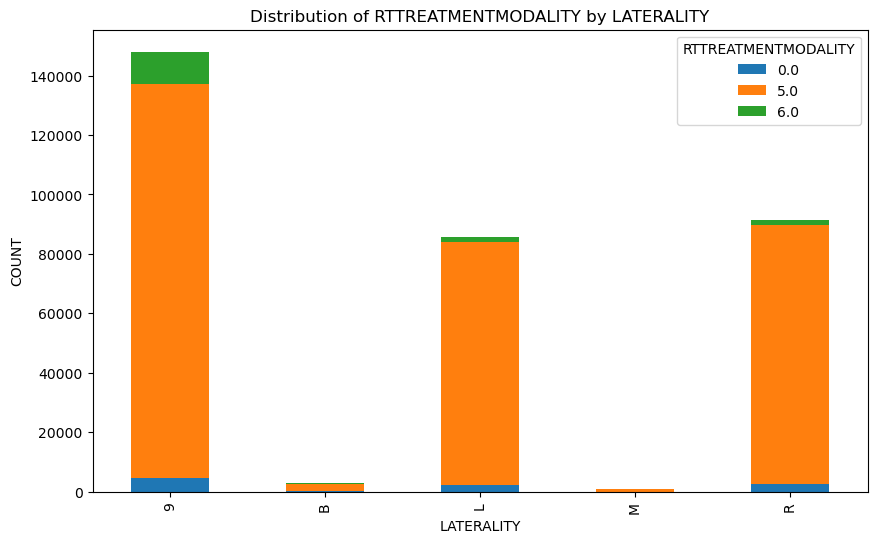

In [5]:
import matplotlib.pyplot as plt

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
result.pivot(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT').plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3793692238.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3793692238.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')


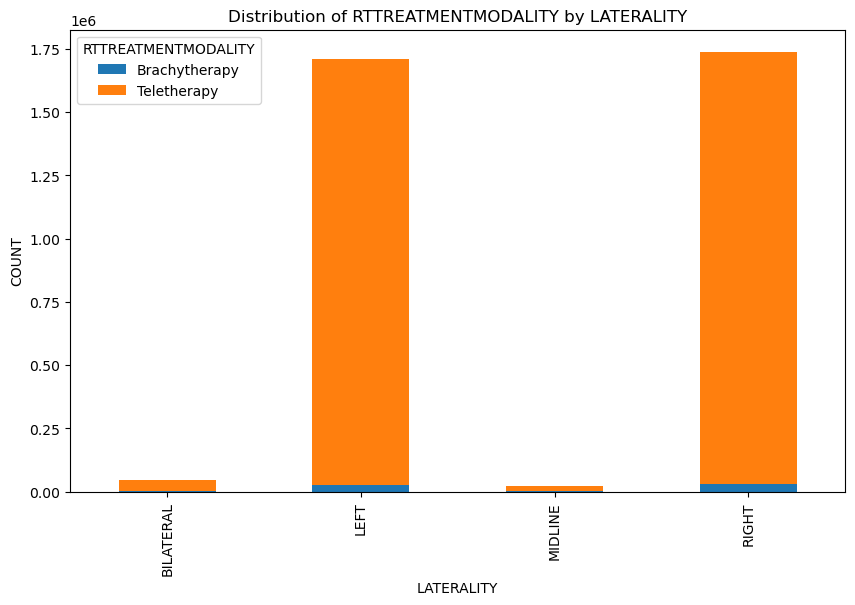

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0
merged_data = merged_data.fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Sort by 'PATIENTID' in ascending order
merged_data = merged_data.sort_values(by='PATIENTID')

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = merged_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
result.pivot(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT').plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2684582899.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2684582899.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')


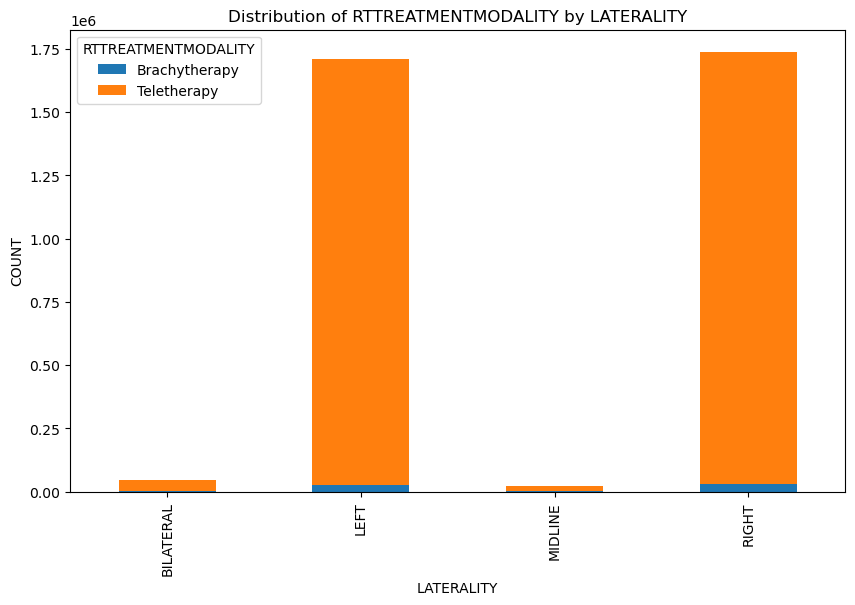

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Sort by 'PATIENTID' in ascending order
merged_data = merged_data.sort_values(by='PATIENTID')

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = merged_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
result.pivot(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT').plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\679120922.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\679120922.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')


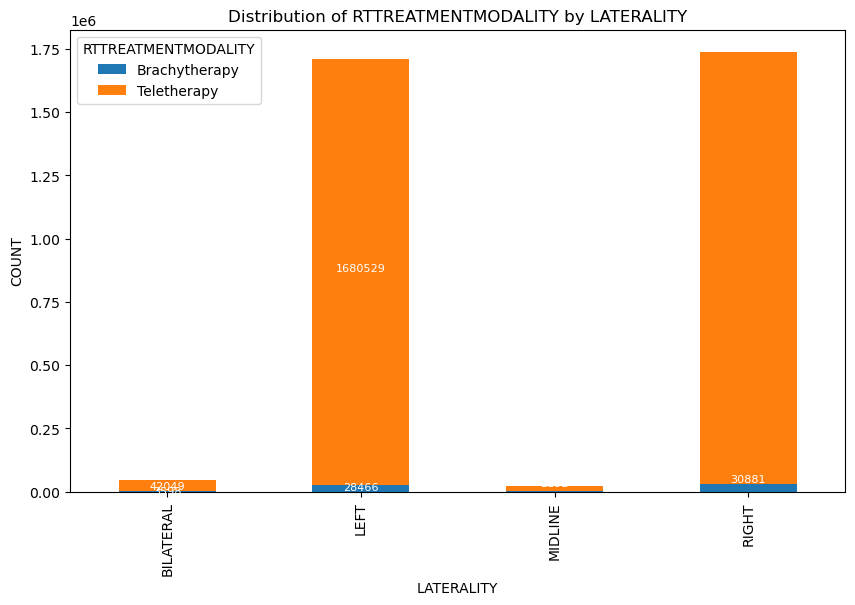

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Sort by 'PATIENTID' in ascending order
merged_data = merged_data.sort_values(by='PATIENTID')

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = merged_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data = result.pivot(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT')
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count
for col in pivot_data.columns:
    for i, value in enumerate(pivot_data[col]):
        if not pd.isnull(value):
            ax.annotate(str(int(value)), (i, pivot_data.iloc[:i][col].sum() + value / 2),
                        ha='center', va='center', fontsize=8, color='white')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\1313704237.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\1313704237.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\1313704237.py:42: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (colname, ser) in enumerate(pivot_data.iteritems()):


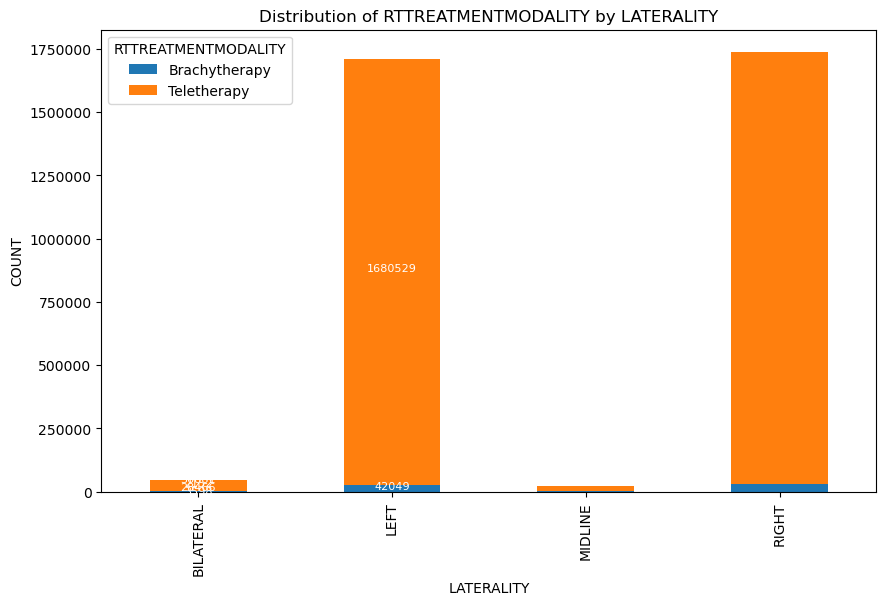

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Sort by 'PATIENTID' in ascending order
merged_data = merged_data.sort_values(by='PATIENTID')

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = merged_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data = result.pivot(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT')
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count
for i, (colname, ser) in enumerate(pivot_data.iteritems()):
    for idx, value in enumerate(ser):
        if not pd.isnull(value):
            ax.annotate(str(int(value)), (i, pivot_data.iloc[:idx][colname].sum() + value / 2),
                        ha='center', va='center', fontsize=8, color='white')

# Format y-axis as integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3700917780.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))


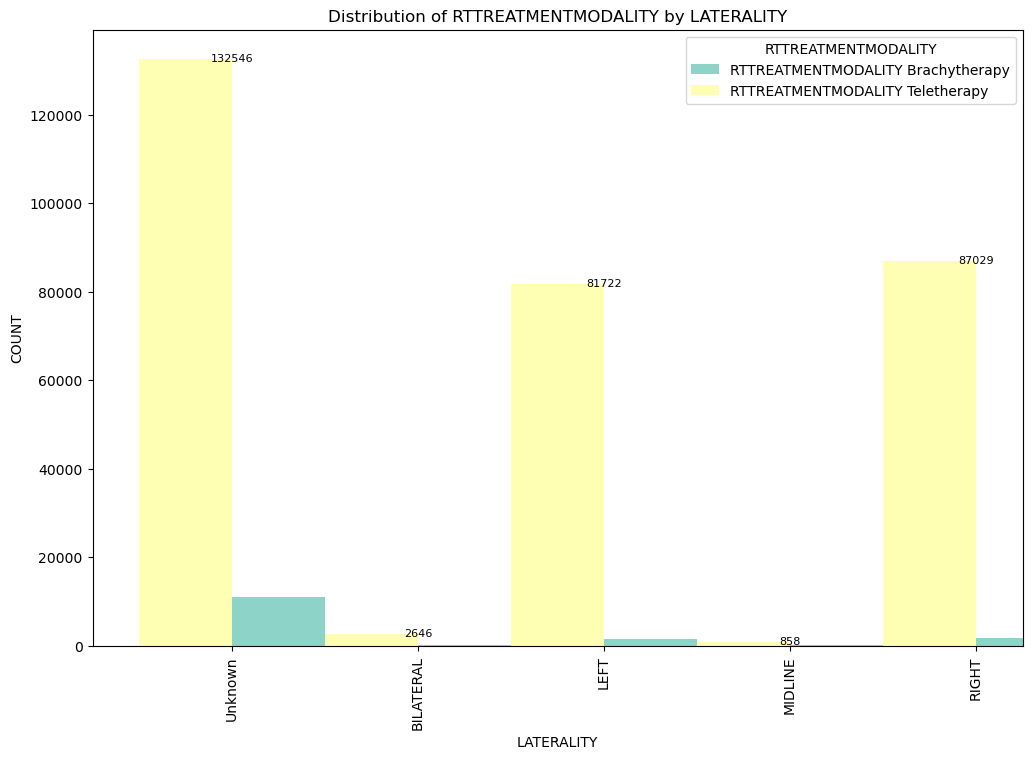

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': [9, 'B', 'L', 'M', 'R', 9, 'B', 'L', 'M', 'R'],
    'COUNT': [132546, 2646, 81722, 858, 87029, 10982, 266, 1498, 81, 1756]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({9: 'Unknown', 'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))

for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    group.plot(kind='bar', x='LATERALITY', y='COUNT', ax=ax, color=colors(i), label=f'RTTREATMENTMODALITY {rt}', position=i)

# Annotate each bar with the count
for i, rt in enumerate(df['RTTREATMENTMODALITY'].unique()):
    for idx, row in df[df['RTTREATMENTMODALITY'] == rt].iterrows():
        ax.annotate(str(int(row['COUNT'])), (idx + i * 0.2, row['COUNT'] + 100),
                    ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2890193099.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))


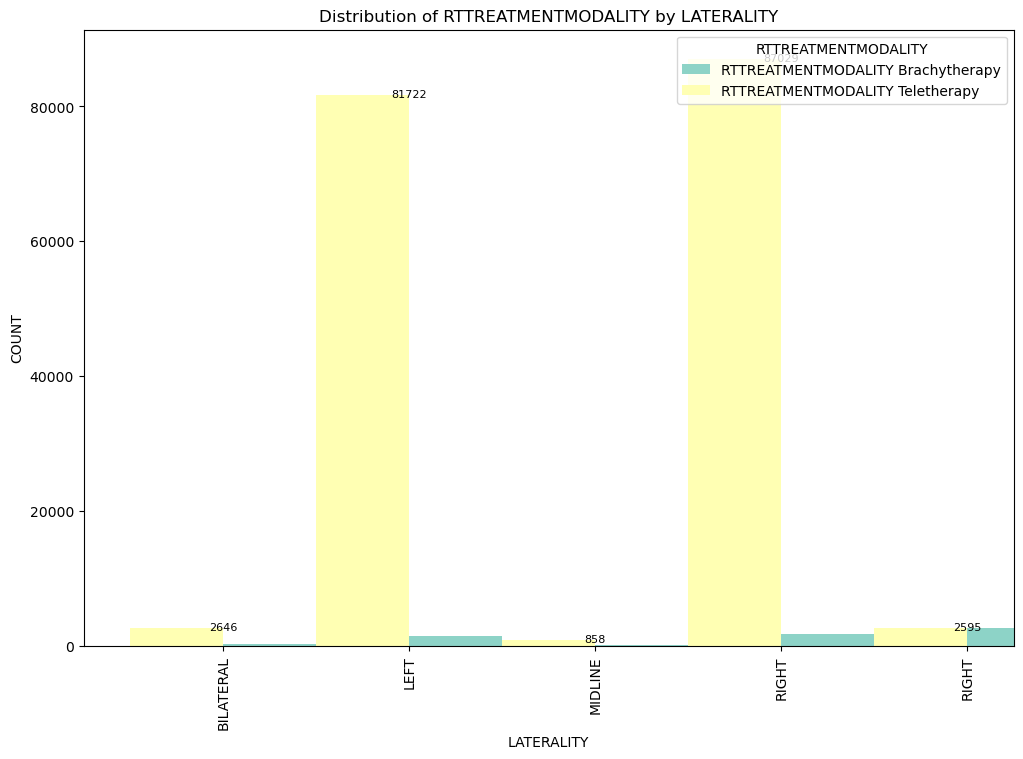

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))

for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    group.plot(kind='bar', x='LATERALITY', y='COUNT', ax=ax, color=colors(i), label=f'RTTREATMENTMODALITY {rt}', position=i)

# Annotate each bar with the count
for i, rt in enumerate(df['RTTREATMENTMODALITY'].unique()):
    for idx, row in df[df['RTTREATMENTMODALITY'] == rt].iterrows():
        ax.annotate(str(int(row['COUNT'])), (idx + i * 0.2, row['COUNT'] + 100),
                    ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2124425720.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))


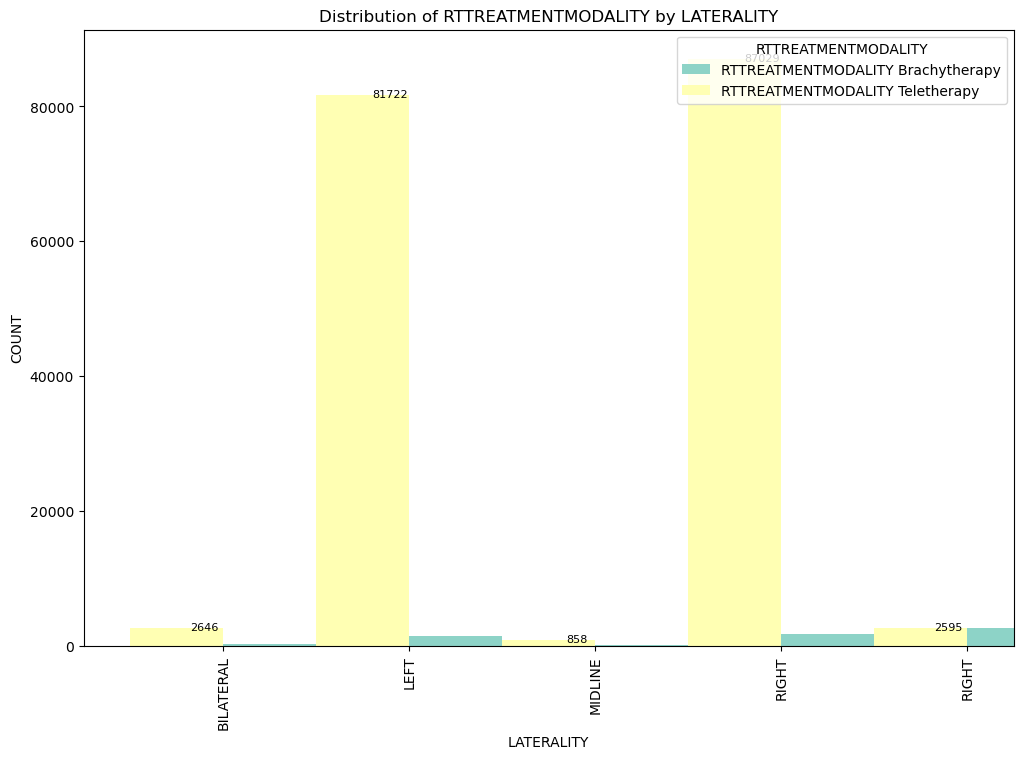

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))

for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    group.plot(kind='bar', x='LATERALITY', y='COUNT', ax=ax, color=colors(i), label=f'RTTREATMENTMODALITY {rt}', position=i)

# Annotate each bar with the count
for i, rt in enumerate(df['RTTREATMENTMODALITY'].unique()):
    for idx, row in df[df['RTTREATMENTMODALITY'] == rt].iterrows():
        ax.annotate(str(int(row['COUNT'])), (idx + i * 0.2 - 0.1, row['COUNT'] + 100),
                    ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\1769191497.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))


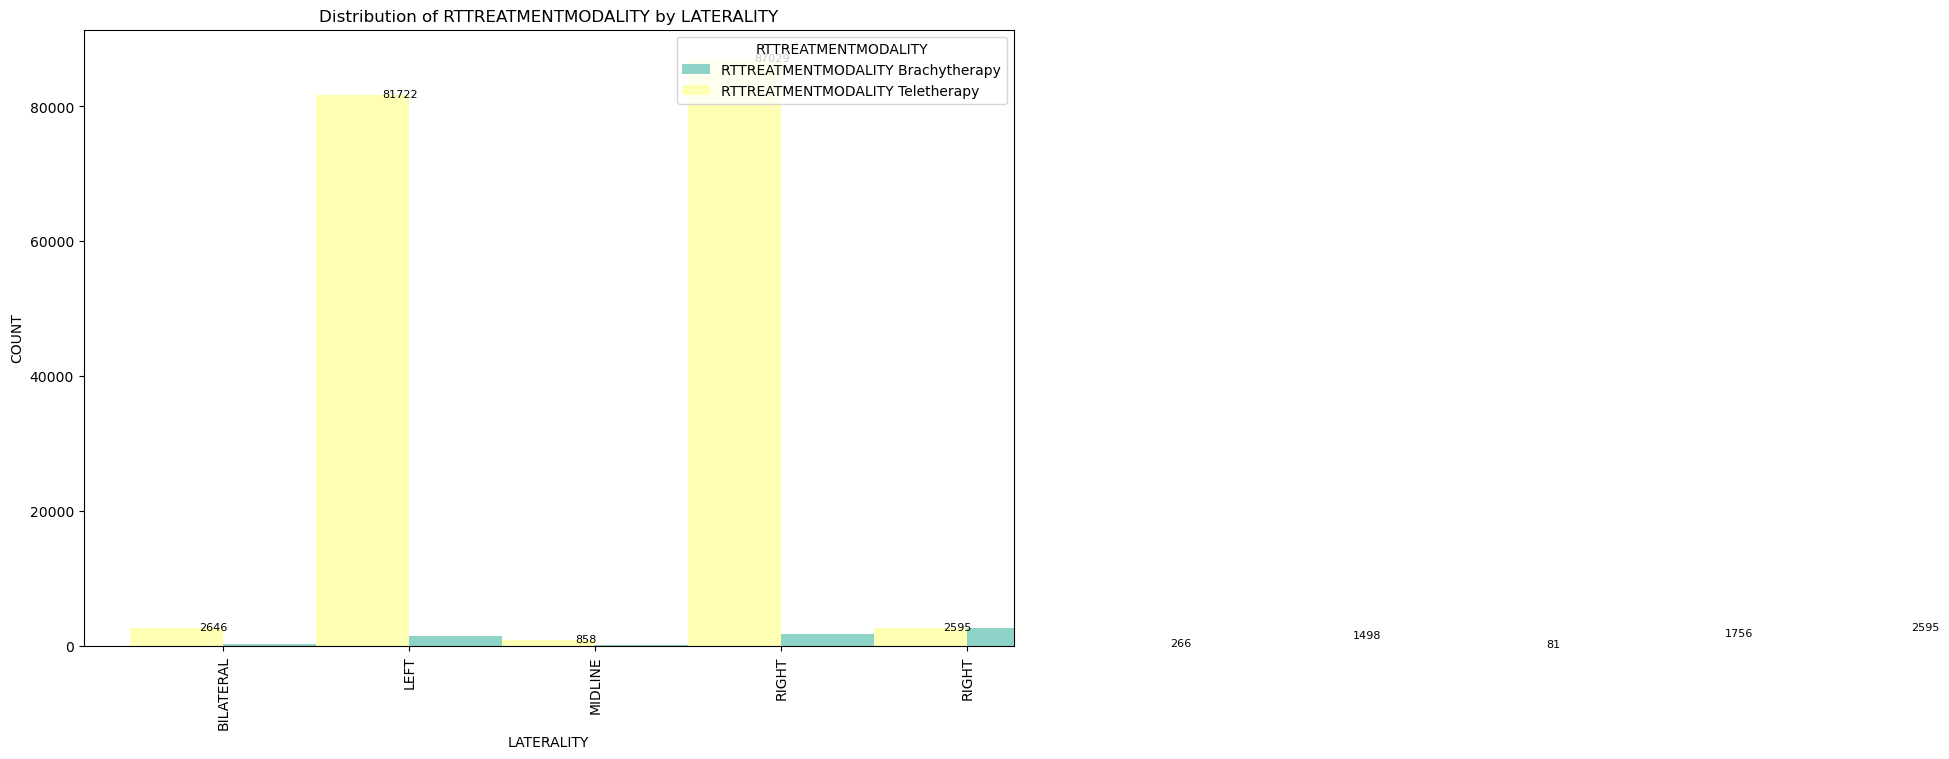

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))

for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    group.plot(kind='bar', x='LATERALITY', y='COUNT', ax=ax, color=colors(i), label=f'RTTREATMENTMODALITY {rt}', position=i)

# Annotate each bar with the count
for i, rt in enumerate(df['RTTREATMENTMODALITY'].unique()):
    for idx, row in df[df['RTTREATMENTMODALITY'] == rt].iterrows():
        ax.text(idx + i * 0.2 - 0.05, row['COUNT'] + 100, str(int(row['COUNT'])),
                ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\343028728.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))


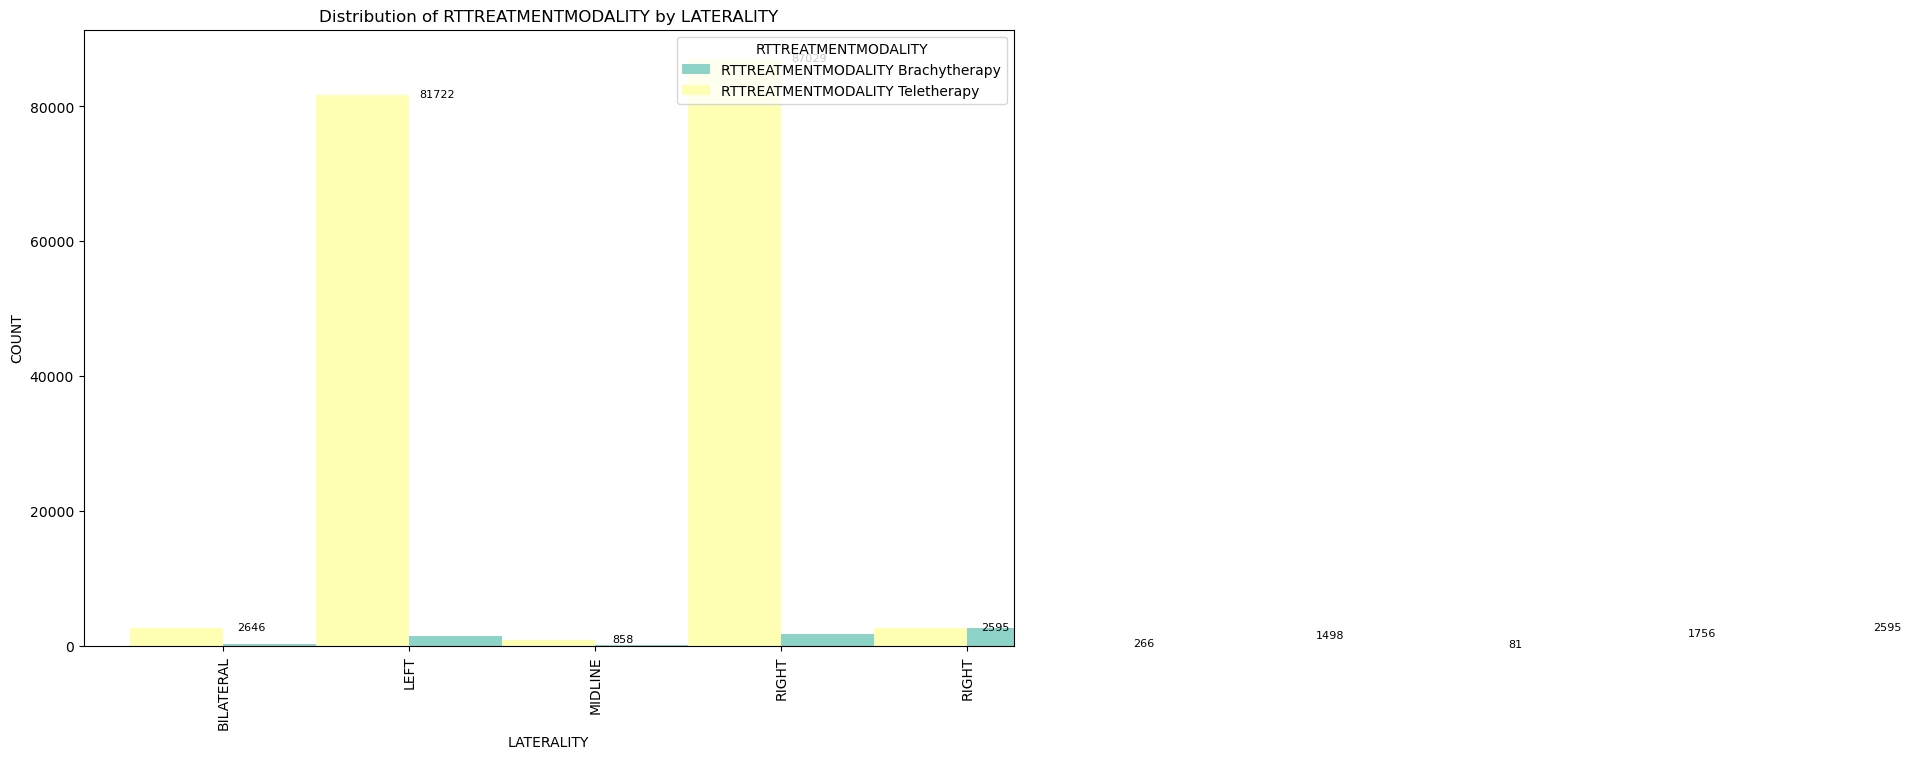

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))

for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    group.plot(kind='bar', x='LATERALITY', y='COUNT', ax=ax, color=colors(i), label=f'RTTREATMENTMODALITY {rt}', position=i)

# Annotate each bar with the count
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        ax.text(idx + i * 0.2 - 0.05, row['COUNT'] + 100, str(int(row['COUNT'])),
                ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3844541542.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))


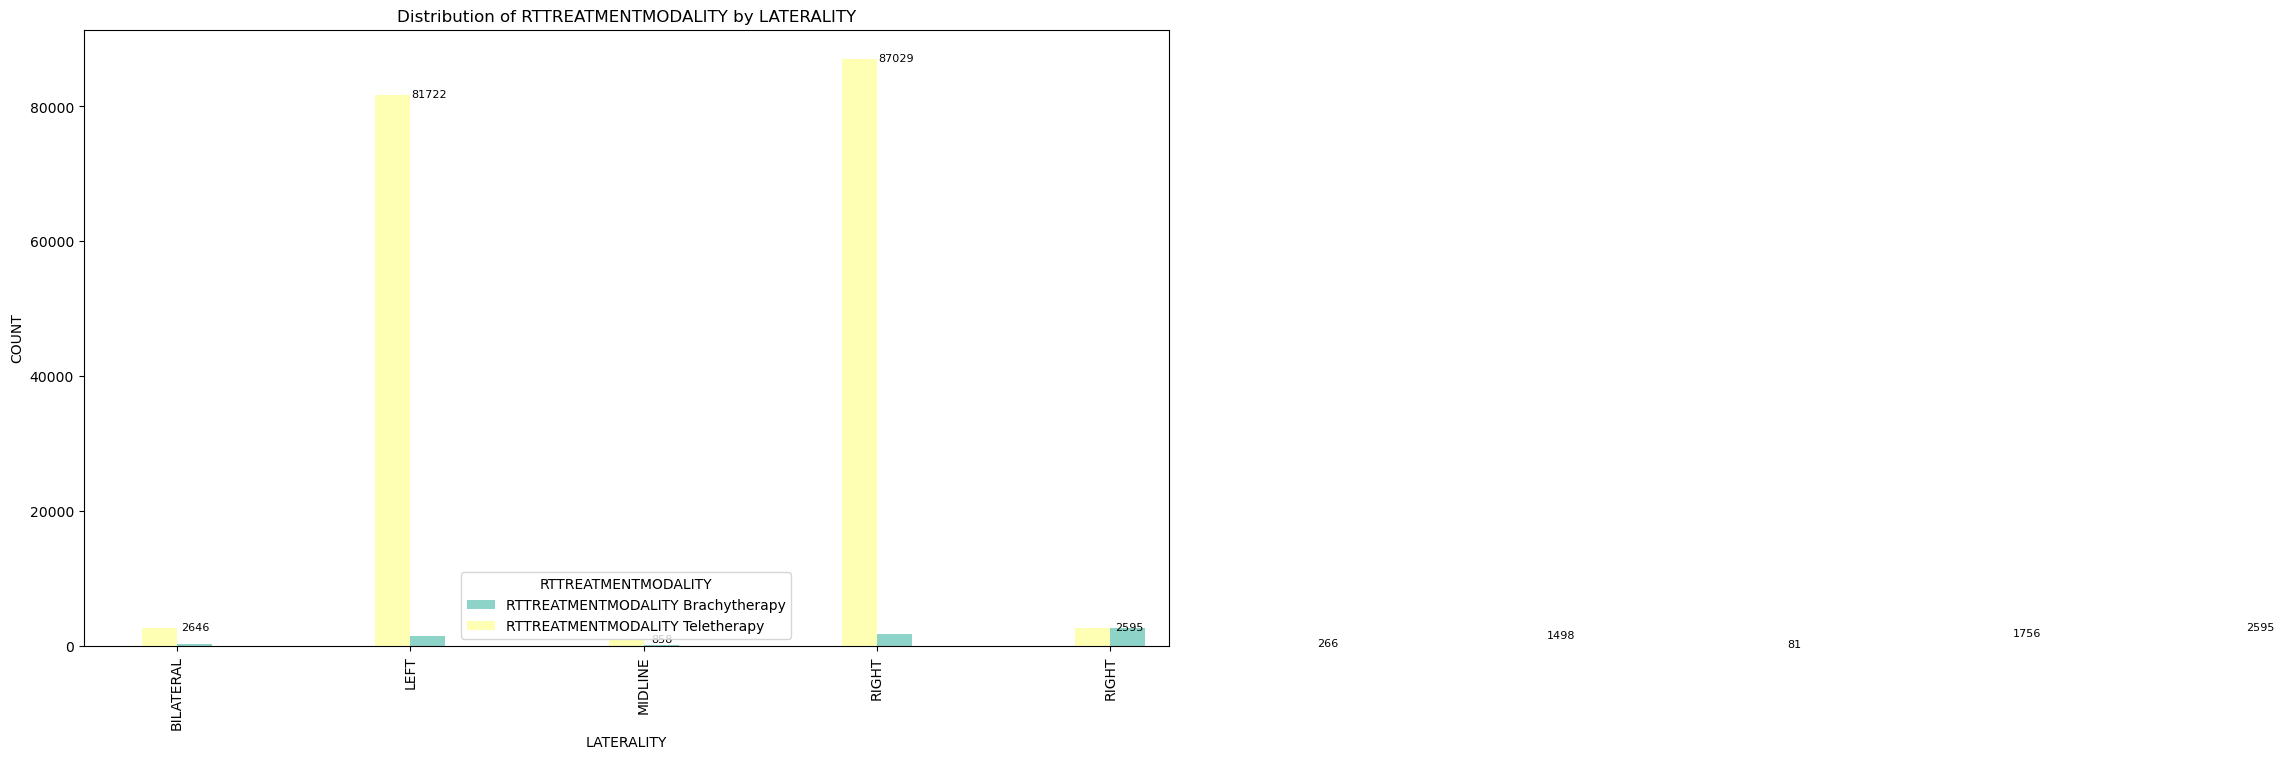

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.get_cmap('Set3', len(df['RTTREATMENTMODALITY']))

for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    group.plot(kind='bar', x='LATERALITY', y='COUNT', ax=ax, color=colors(i), label=f'RTTREATMENTMODALITY {rt}', position=i, width=0.15)

# Annotate each bar with the count
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        ax.text(idx + i * 0.15 - 0.07, row['COUNT'] + 100, str(int(row['COUNT'])),
                ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


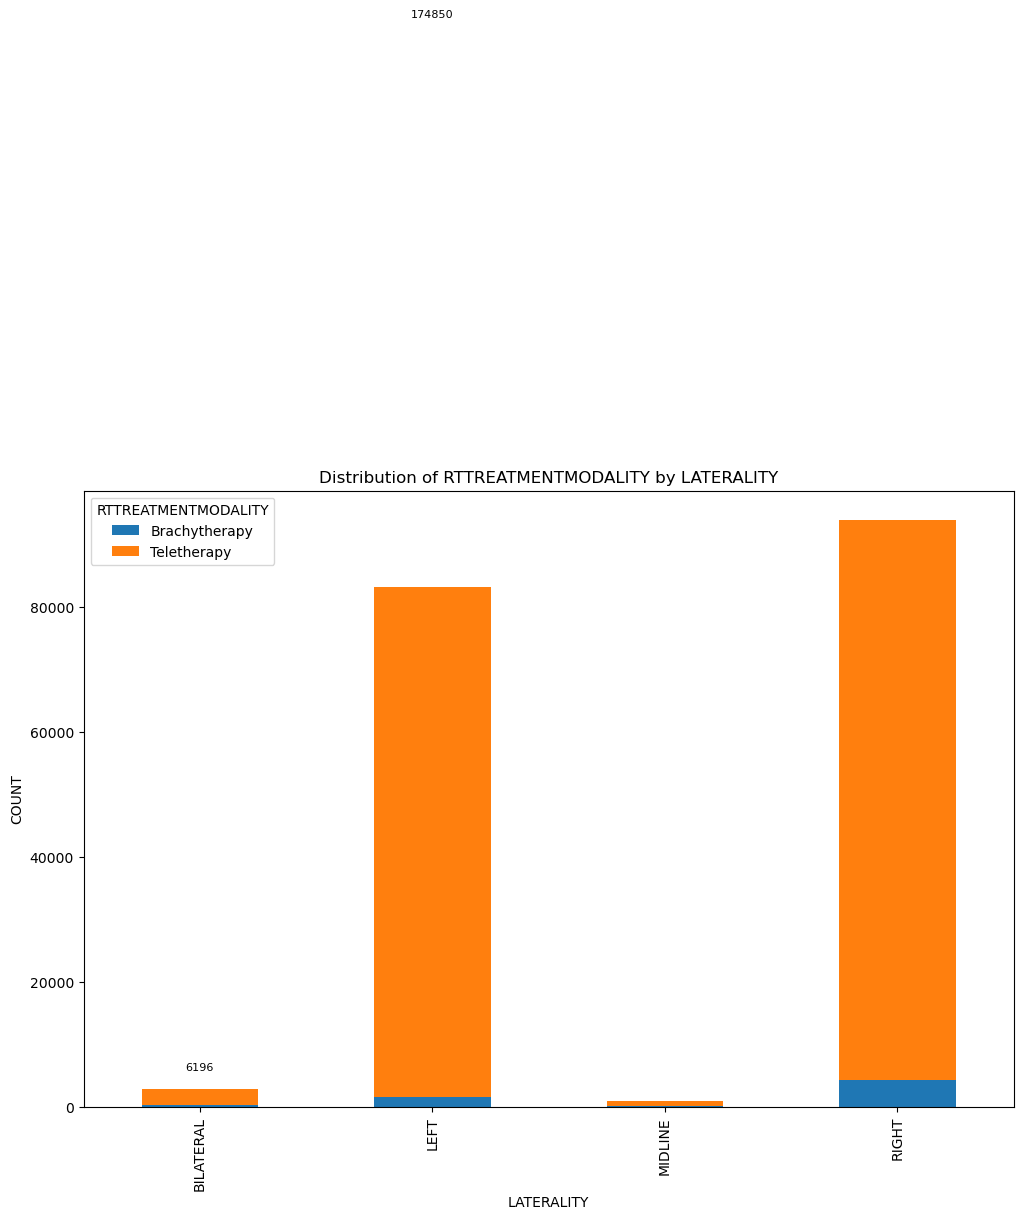

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the total count
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    total_count = group['COUNT'].sum()
    ax.text(i, total_count + 100, str(int(total_count)),
            ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


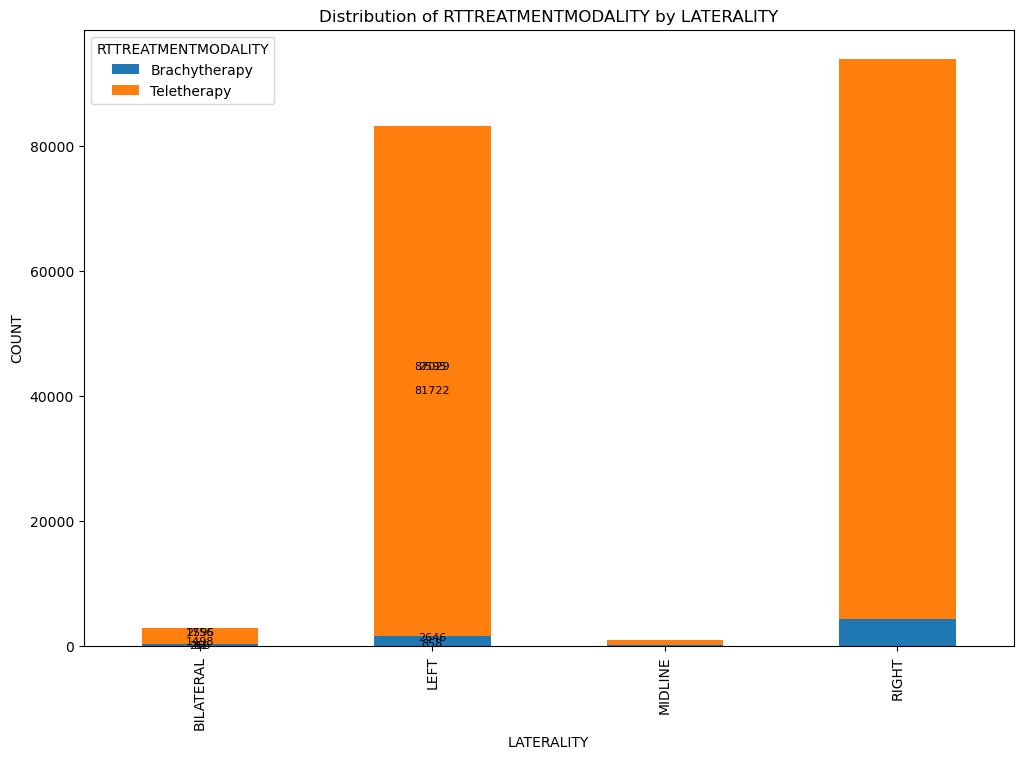

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each segment of the stacked bar with the count value
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = row['COUNT']
        ax.text(i, pivot_data.loc[row['LATERALITY'], rt] / 2, str(int(count)),
                ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


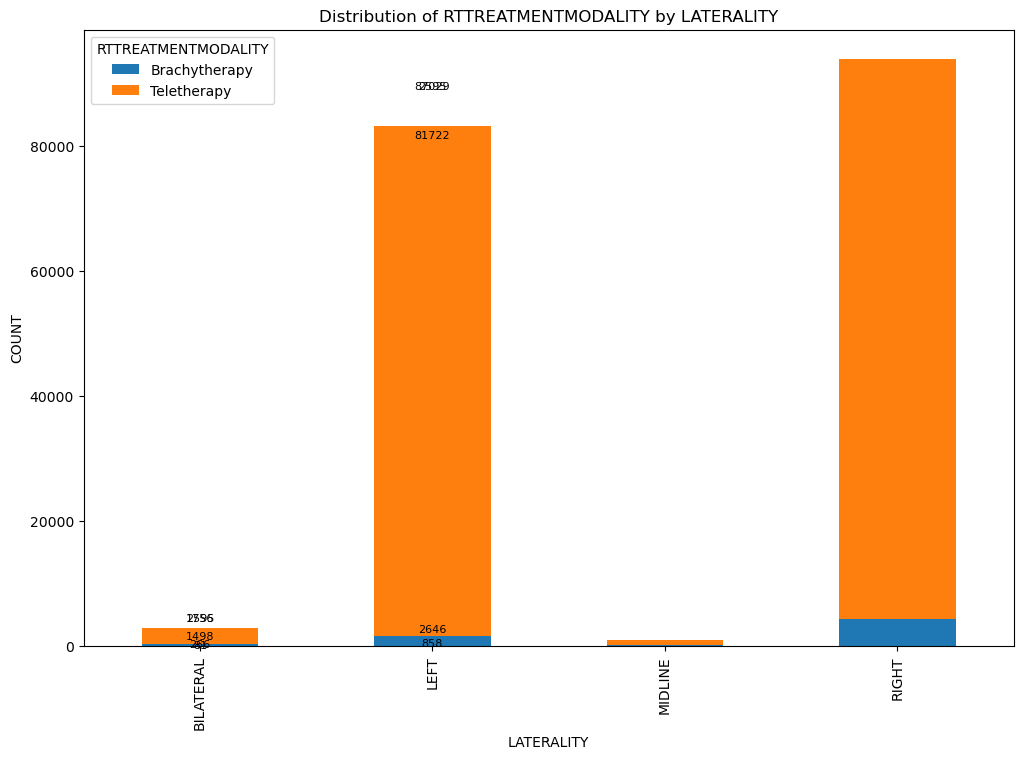

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each segment of the stacked bar with the count value
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = row['COUNT']
        if row['LATERALITY'] == 'MIDLINE':
            ax.text(i, pivot_data.loc[row['LATERALITY'], rt] / 2, str(int(count)),
                    ha='center', va='center', fontsize=8, color='black')
        else:
            ax.text(i, pivot_data.loc[row['LATERALITY'], rt], str(int(count)),
                    ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


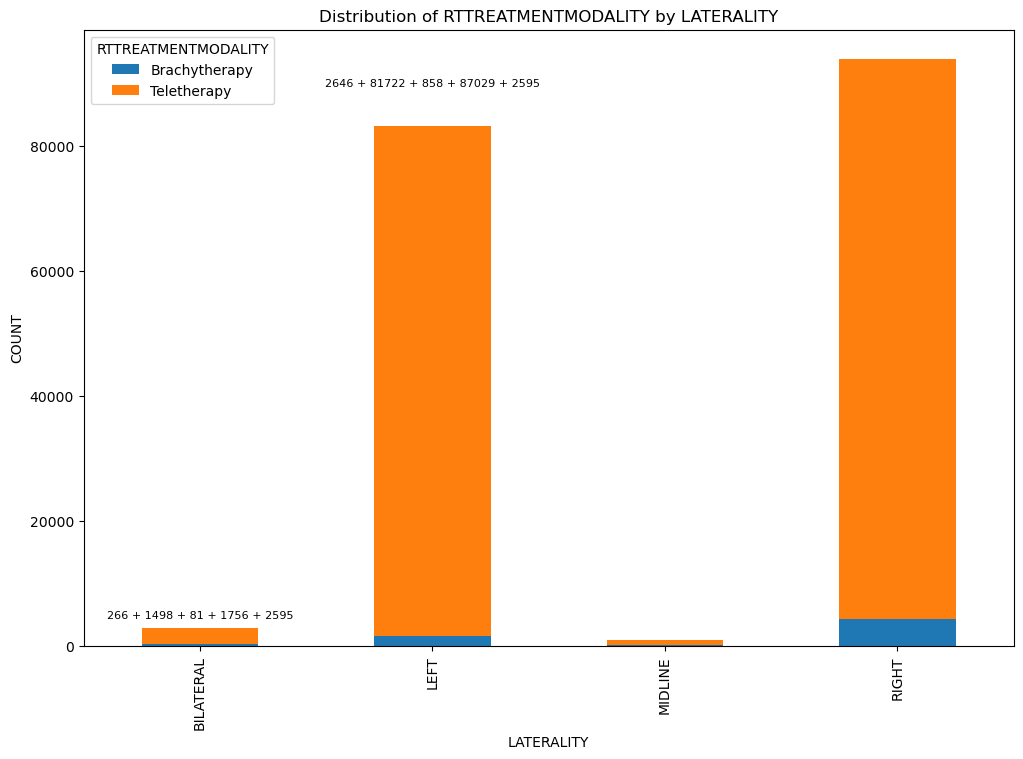

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the stacked count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    count_values = [str(int(row['COUNT'])) for idx, row in group.iterrows()]
    counts = ' + '.join(count_values)
    ax.text(i, pivot_data[rt].max() + 500, counts, ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


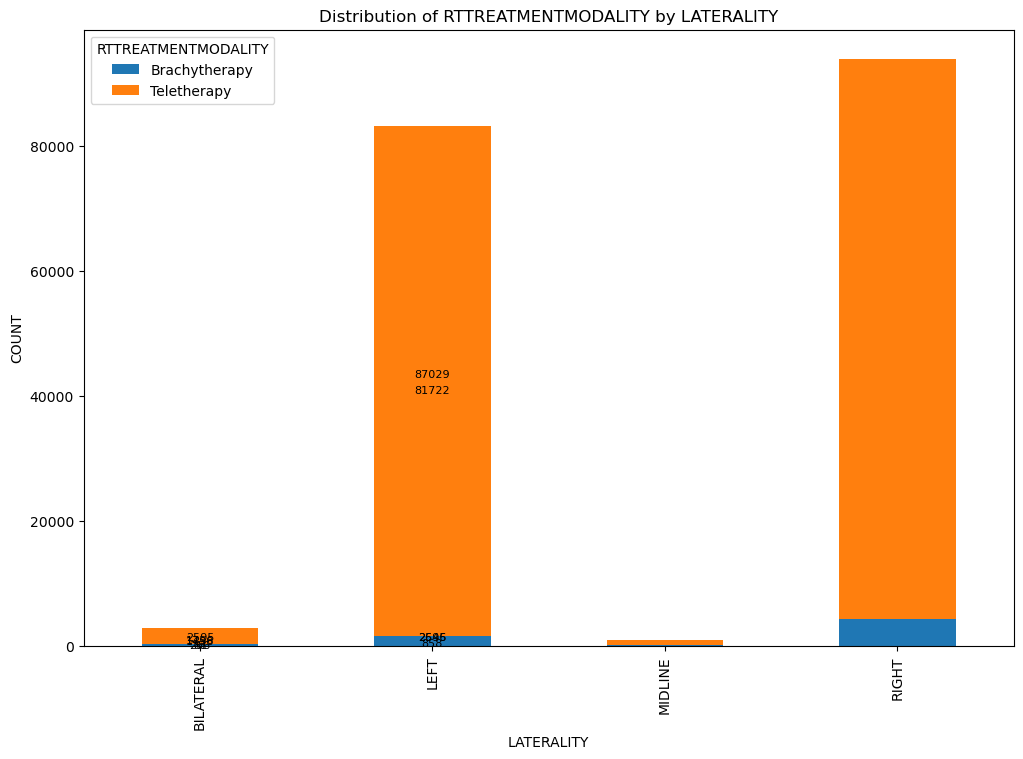

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.text(i, row['COUNT'] / 2, count, ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


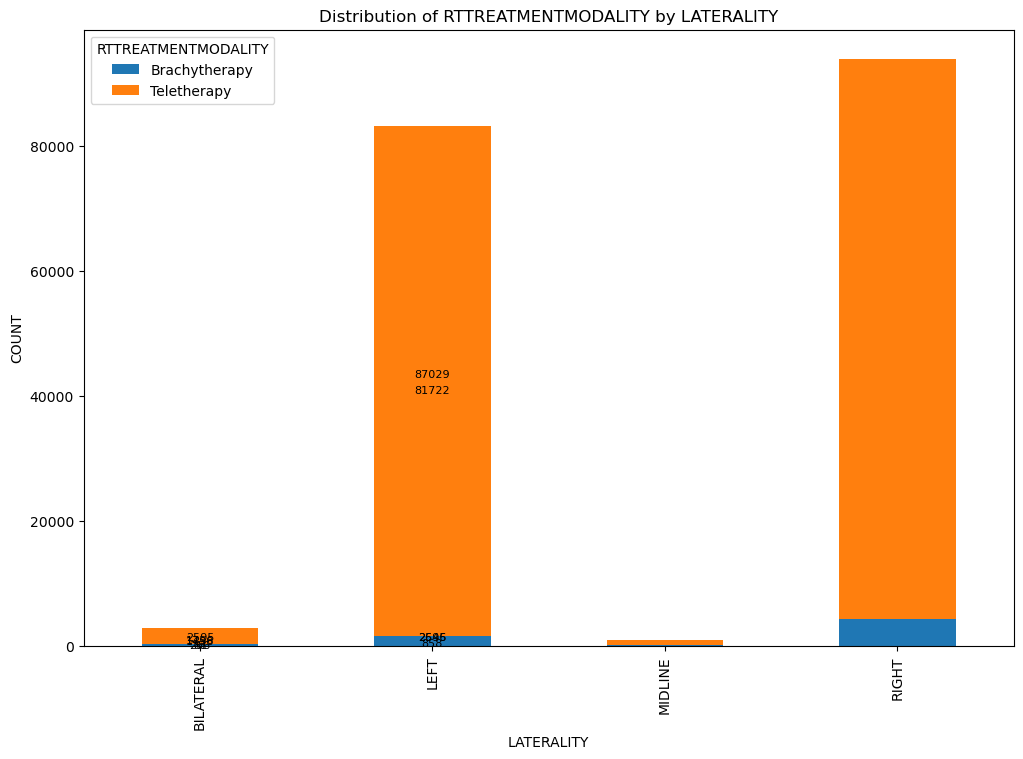

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.annotate(count, xy=(i, row['COUNT'] / 2), ha='center', va='center', fontsize=8, color='black')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


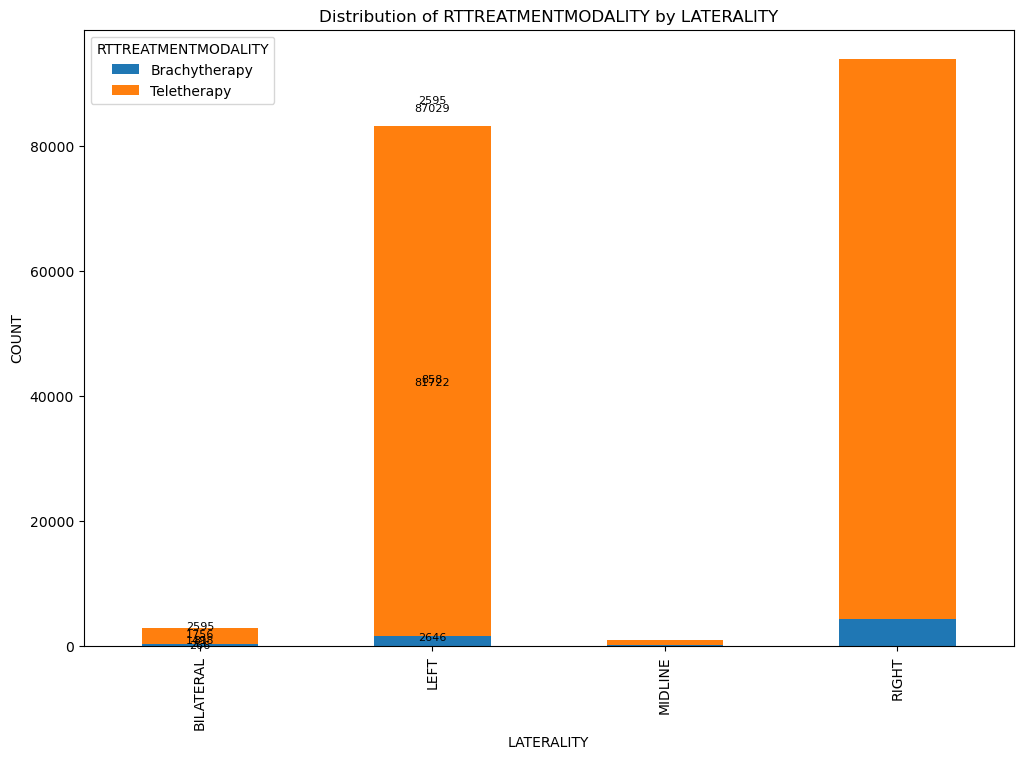

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    offset = 0
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.annotate(count, xy=(i, row['COUNT'] / 2 + offset), ha='center', va='center', fontsize=8, color='black')
        offset += row['COUNT'] / 2

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.xlabel('LATERALITY')
plt.ylabel('COUNT')
plt.legend(title='RTTREATMENTMODALITY')
plt.show()


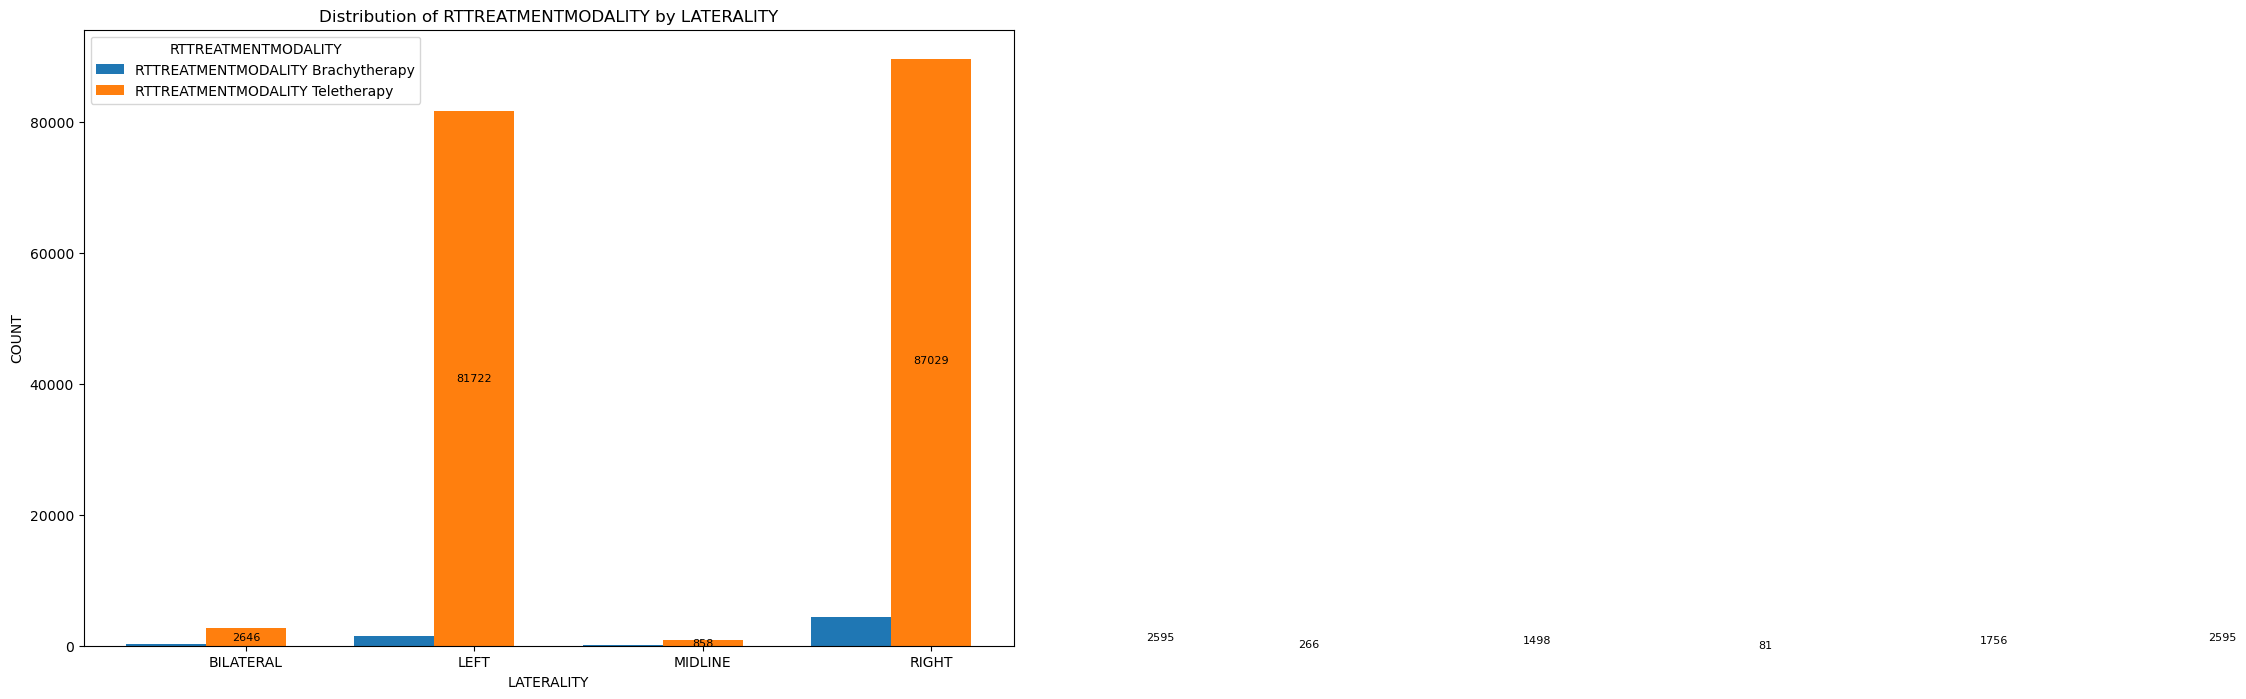

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
bar_positions = range(len(pivot_data.index))

for i, rt in enumerate(pivot_data.columns):
    counts = pivot_data[rt].values
    ax.bar([pos + i * bar_width for pos in bar_positions], counts, width=bar_width, label=f'RTTREATMENTMODALITY {rt}')

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.text(idx + i * bar_width, row['COUNT'] / 2, count, ha='center', va='center', fontsize=8, color='black')

ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(pivot_data.index)
ax.set_xlabel('LATERALITY')
ax.set_ylabel('COUNT')
ax.legend(title='RTTREATMENTMODALITY')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\1479333652.py:49: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


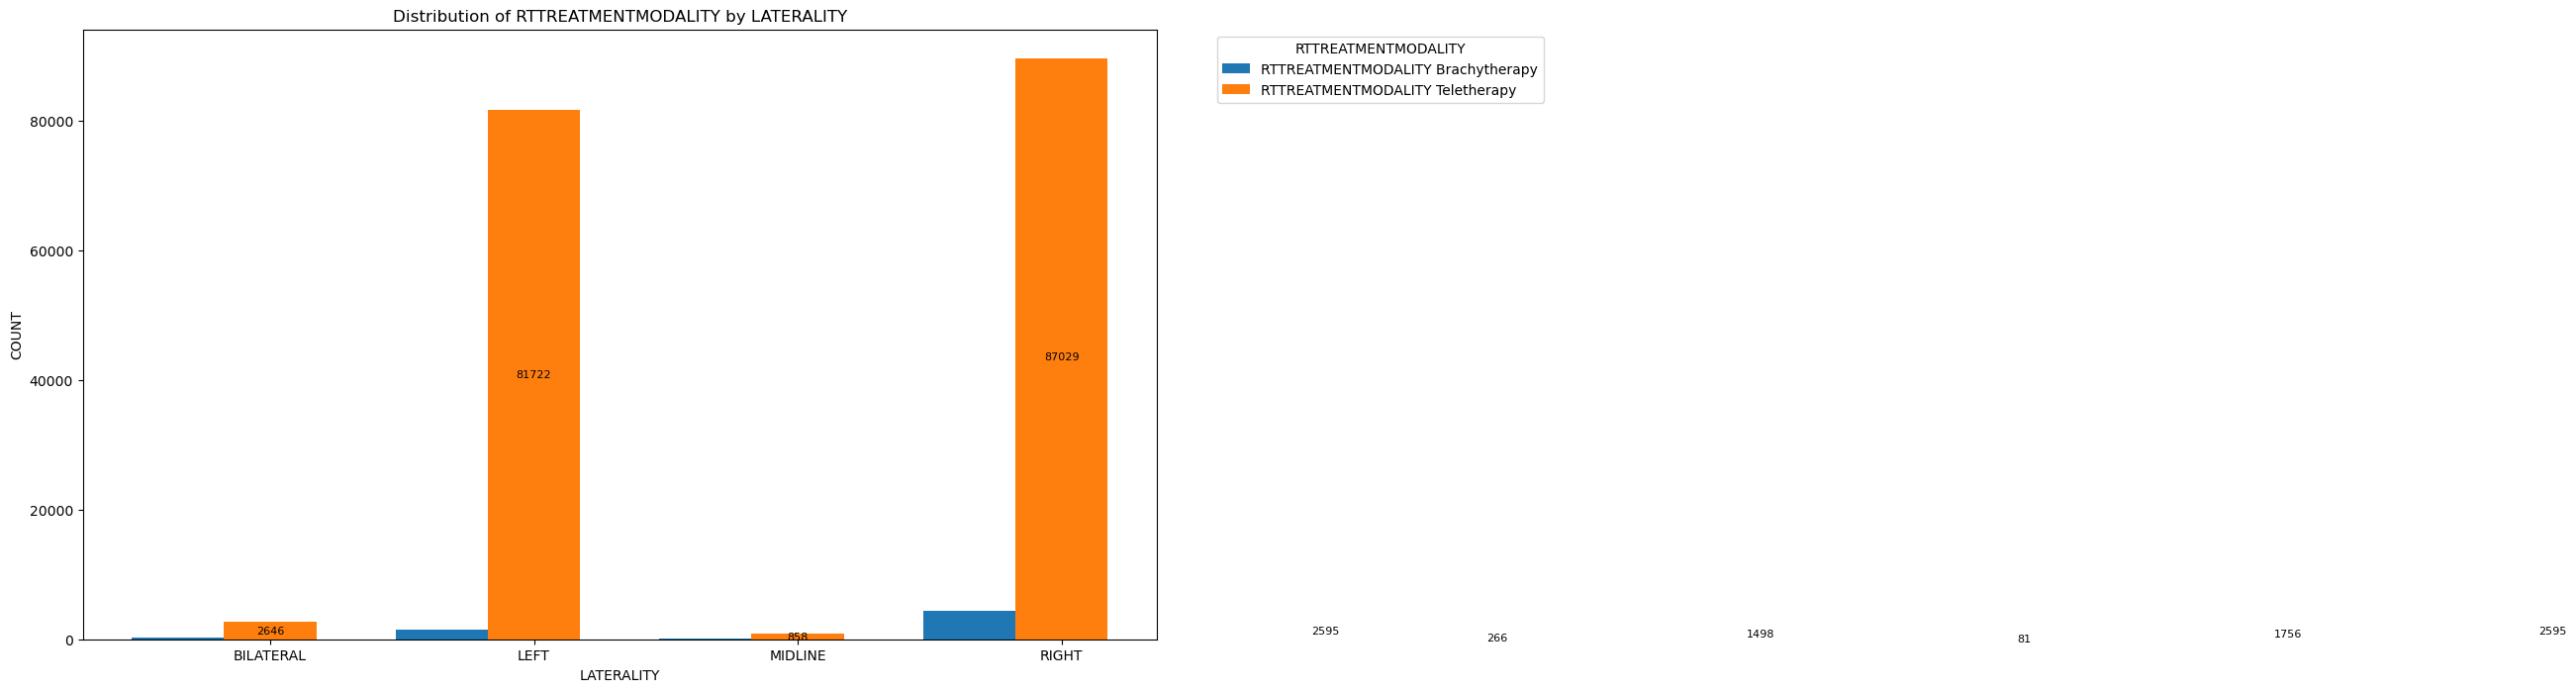

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
bar_positions = range(len(pivot_data.index))

for i, rt in enumerate(pivot_data.columns):
    counts = pivot_data[rt].values
    ax.bar([pos + i * bar_width for pos in bar_positions], counts, width=bar_width, label=f'RTTREATMENTMODALITY {rt}')

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.text(idx + i * bar_width, row['COUNT'] / 2, count, ha='center', va='center', fontsize=8, color='black')

ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(pivot_data.index)
ax.set_xlabel('LATERALITY')
ax.set_ylabel('COUNT')
ax.legend(title='RTTREATMENTMODALITY', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.tight_layout()
plt.show()


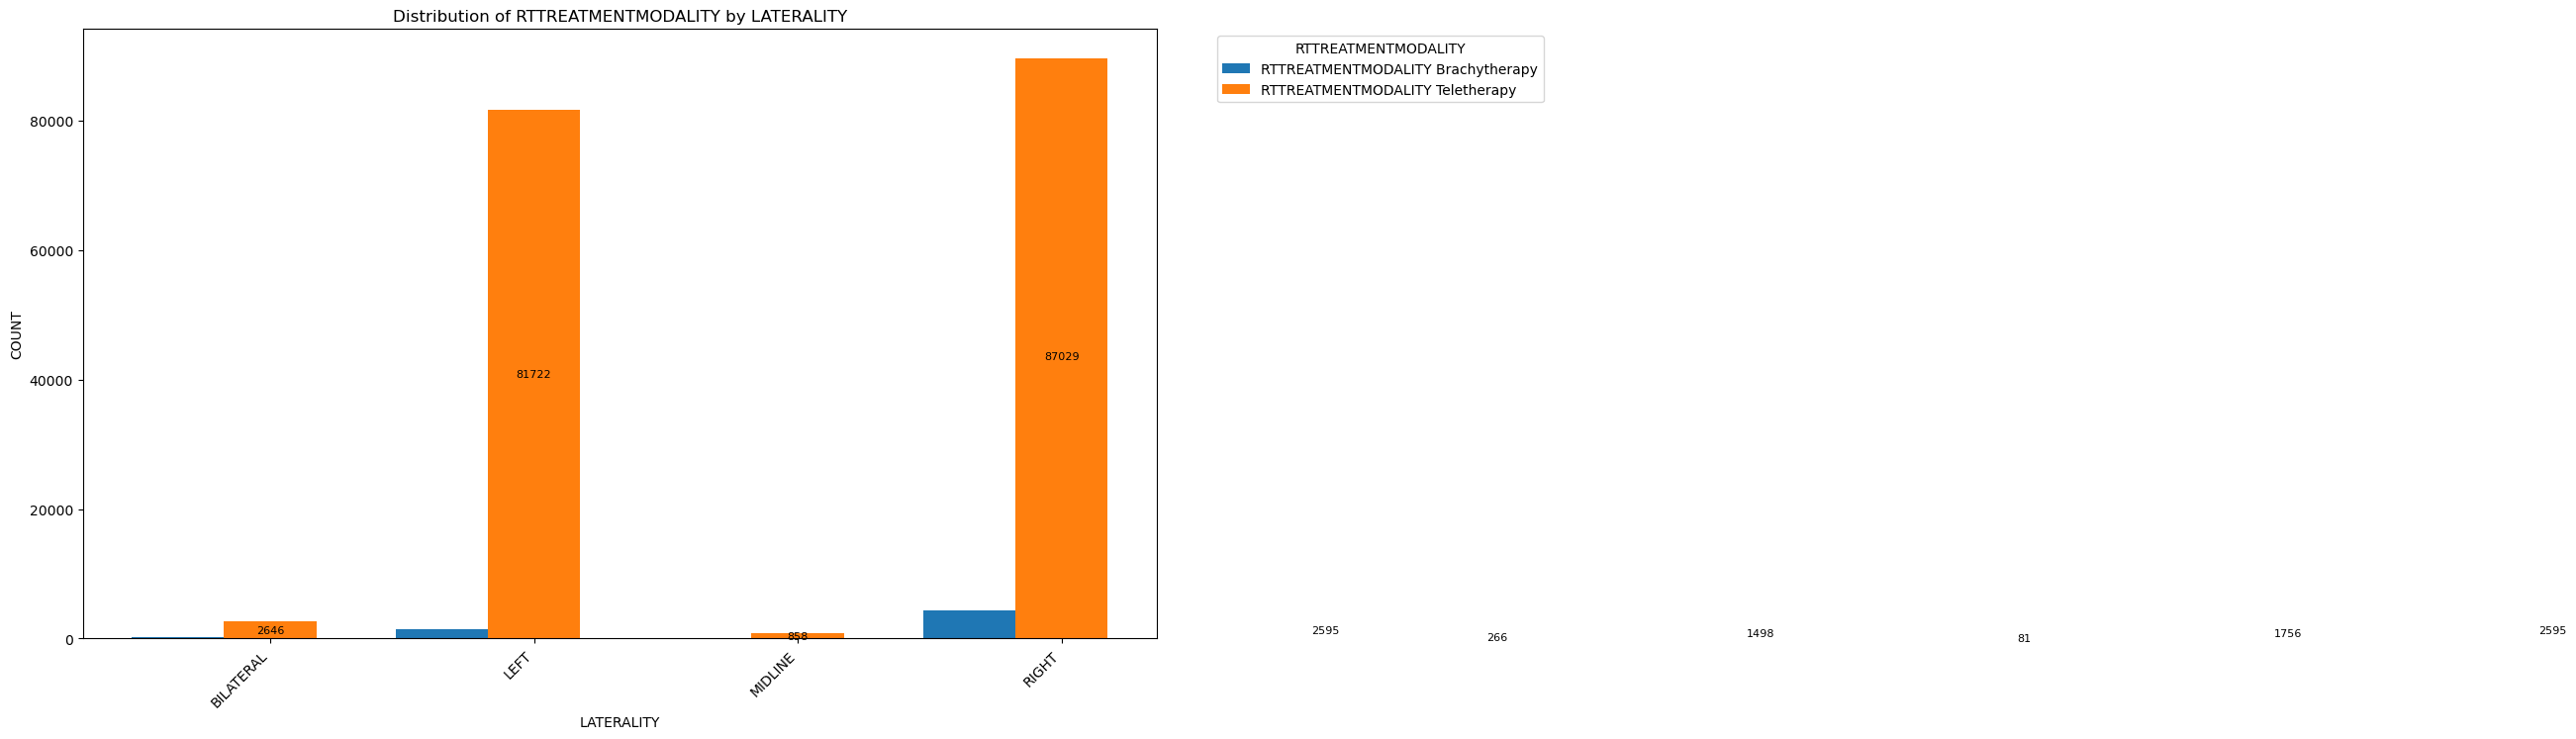

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
bar_positions = range(len(pivot_data.index))

for i, rt in enumerate(pivot_data.columns):
    counts = pivot_data[rt].values
    ax.bar([pos + i * bar_width for pos in bar_positions], counts, width=bar_width, label=f'RTTREATMENTMODALITY {rt}')

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.text(idx + i * bar_width, row['COUNT'] / 2, count, ha='center', va='center', fontsize=8, color='black')

ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.set_xlabel('LATERALITY')
ax.set_ylabel('COUNT')

# Move the legend outside the chart
ax.legend(title='RTTREATMENTMODALITY', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\4237676681.py:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


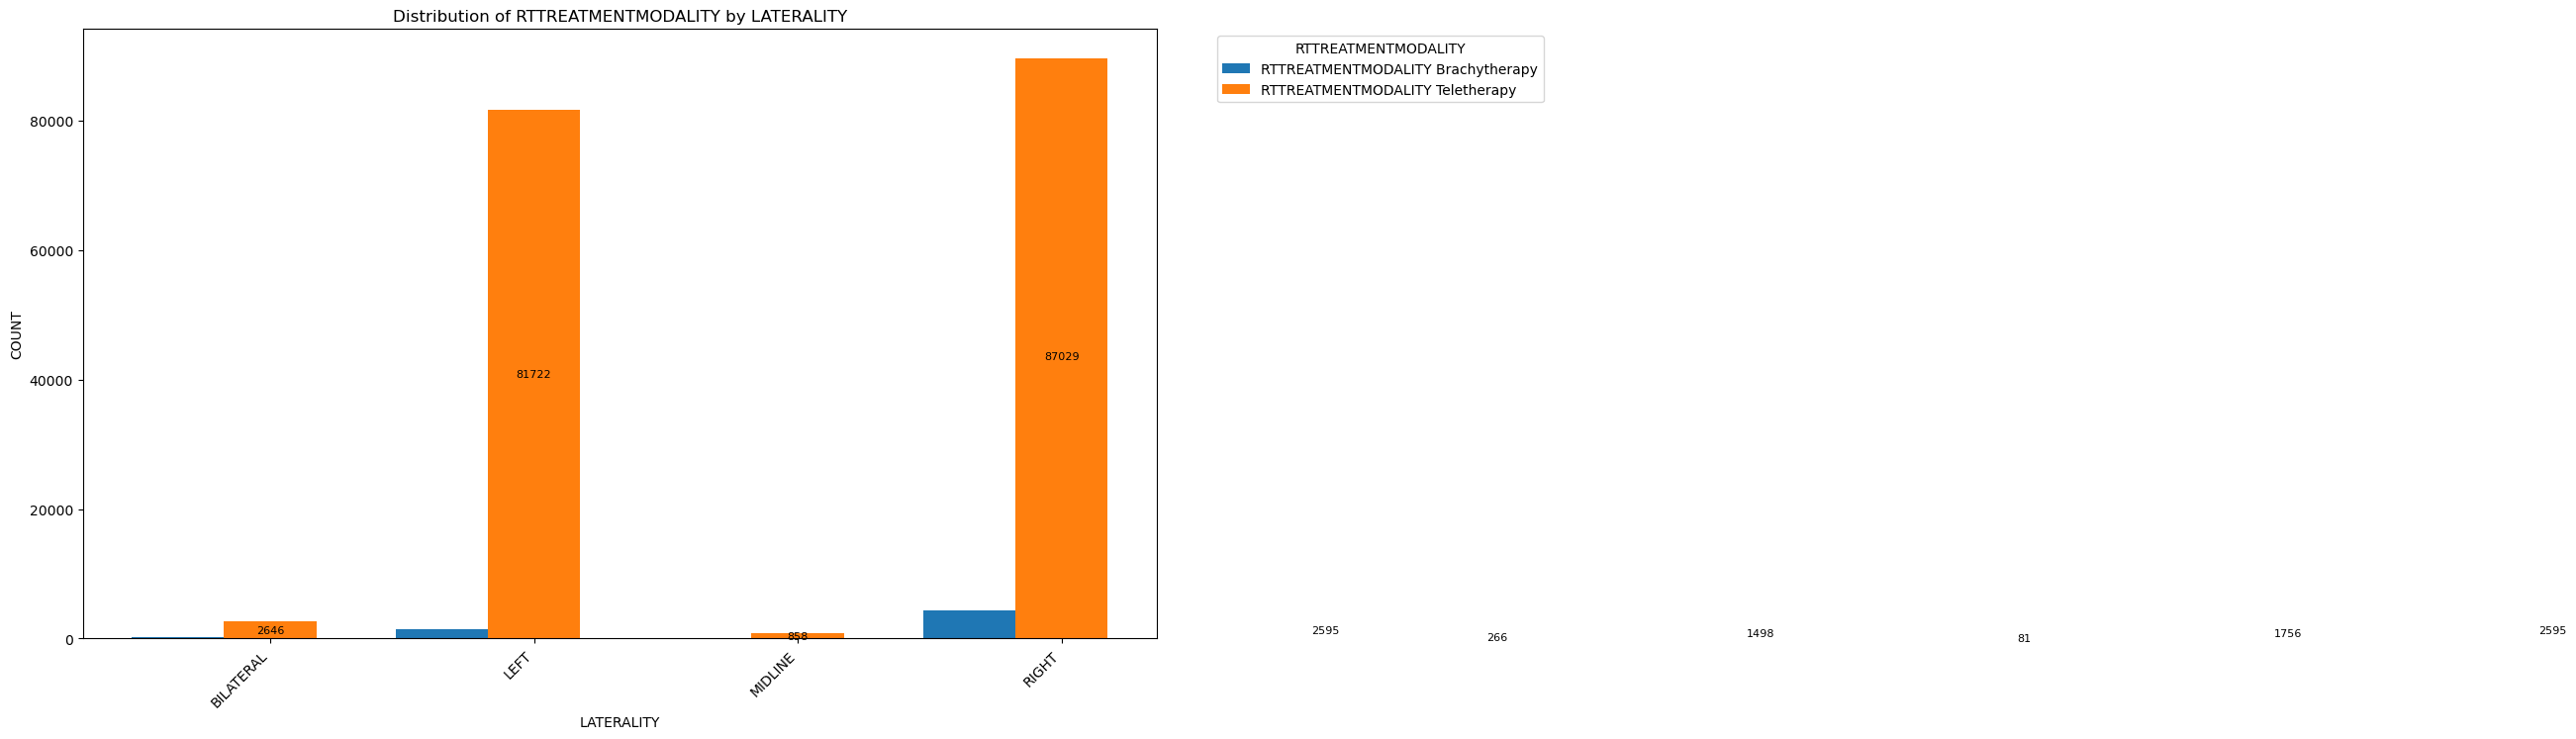

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
bar_positions = range(len(pivot_data.index))

for i, rt in enumerate(pivot_data.columns):
    counts = pivot_data[rt].values
    ax.bar([pos + i * bar_width for pos in bar_positions], counts, width=bar_width, label=f'RTTREATMENTMODALITY {rt}')

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.text(idx + i * bar_width, row['COUNT'] / 2, count, ha='center', va='center', fontsize=8, color='black')

ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.set_xlabel('LATERALITY')
ax.set_ylabel('COUNT')

# Move the legend outside the chart
ax.legend(title='RTTREATMENTMODALITY', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')
plt.tight_layout()
plt.show()


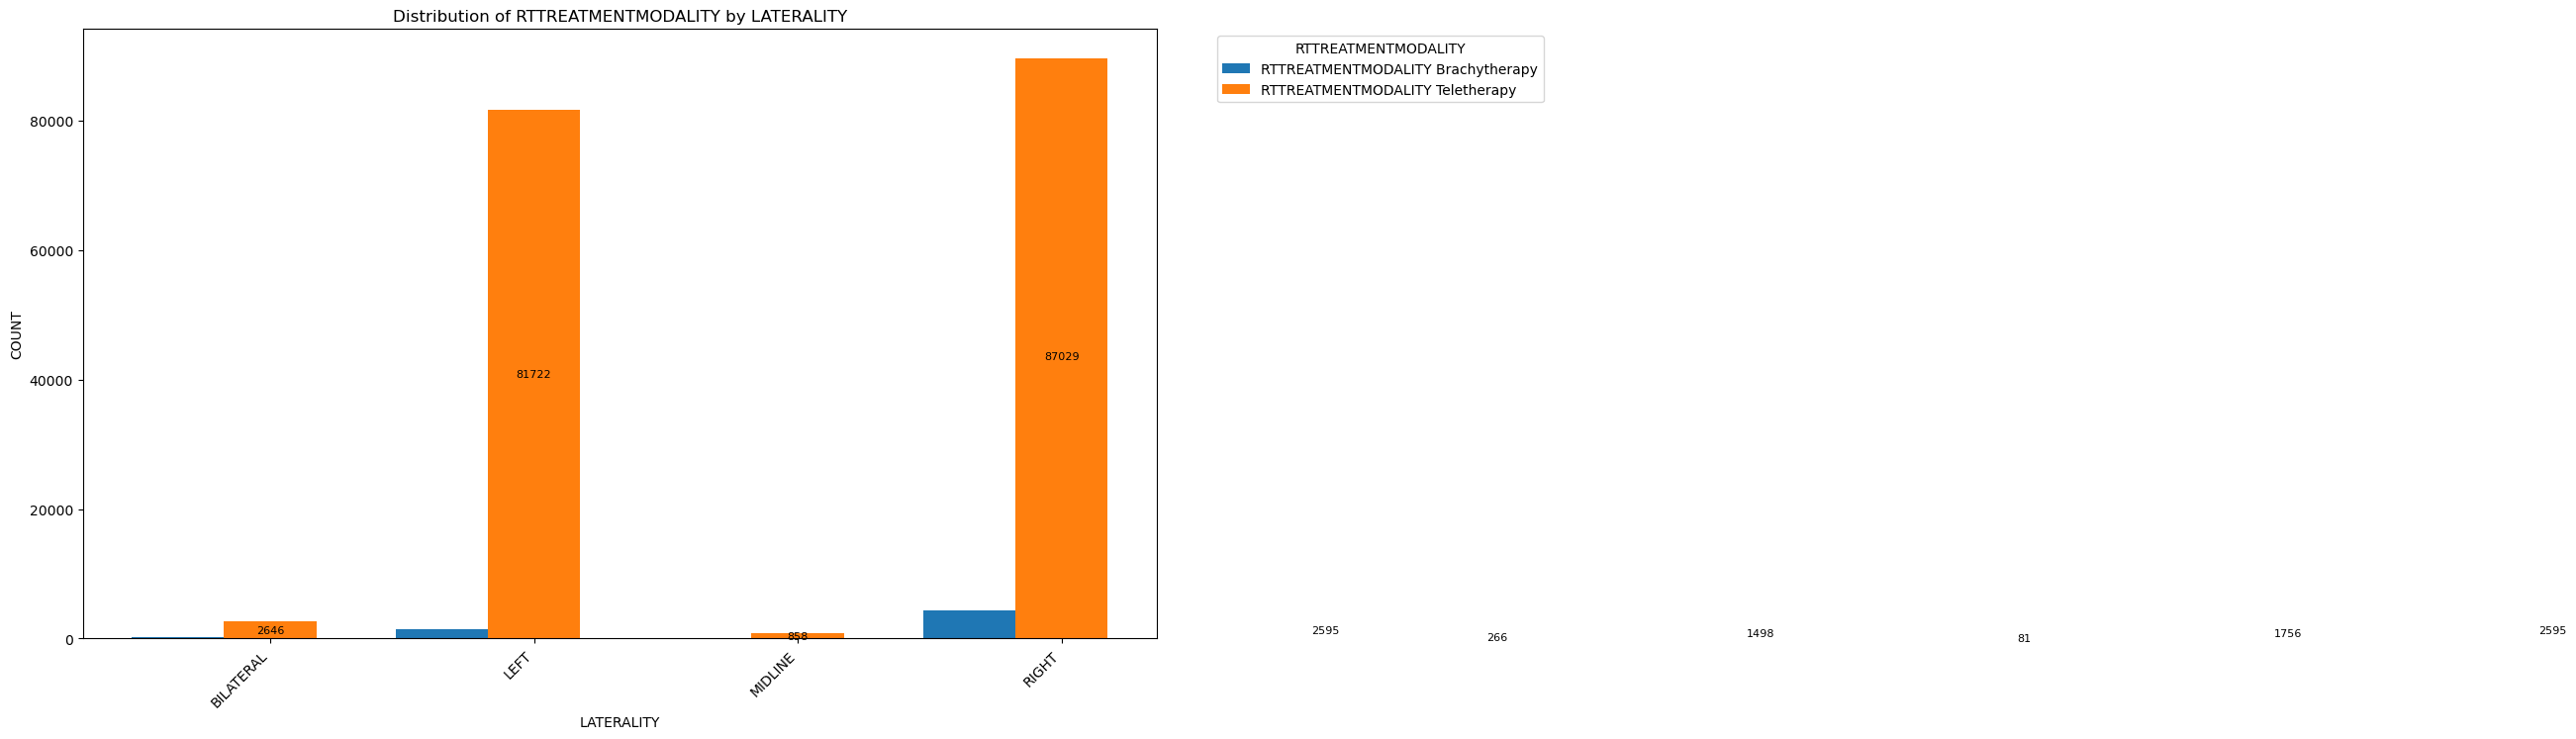

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'RTTREATMENTMODALITY': [5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0],
    'LATERALITY': ['B', 'L', 'M', 'R', 'R', 'B', 'L', 'M', 'R', 'R'],
    'COUNT': [2646, 81722, 858, 87029, 2595, 266, 1498, 81, 1756, 2595]
}

df = pd.DataFrame(data)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
df['LATERALITY'] = df['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
df['RTTREATMENTMODALITY'] = df['RTTREATMENTMODALITY'].map({
    5.0: 'Teletherapy',
    6.0: 'Brachytherapy'
})

# Exclude rows where LATERALITY is equal to 9
df = df[df['LATERALITY'] != 9]

# Pivot the DataFrame for stacked bar chart
pivot_data = df.pivot_table(index='LATERALITY', columns='RTTREATMENTMODALITY', values='COUNT', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
bar_positions = range(len(pivot_data.index))

for i, rt in enumerate(pivot_data.columns):
    counts = pivot_data[rt].values
    ax.bar([pos + i * bar_width for pos in bar_positions], counts, width=bar_width, label=f'RTTREATMENTMODALITY {rt}')

# Annotate each bar with the count values
for i, (rt, group) in enumerate(df.groupby('RTTREATMENTMODALITY')):
    for idx, row in group.iterrows():
        count = str(int(row['COUNT']))
        ax.text(idx + i * bar_width, row['COUNT'] / 2, count, ha='center', va='center', fontsize=8, color='black')

ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.set_xlabel('LATERALITY')
ax.set_ylabel('COUNT')

# Move the legend outside the chart
ax.legend(title='RTTREATMENTMODALITY', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of RTTREATMENTMODALITY by LATERALITY')

# Save the figure to a file
plt.savefig('output_chart.png', bbox_inches='tight')

plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2228809679.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2228809679.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2228809679.py:44: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (colname, ser) in enumerate(pivot_data.iteritems()):


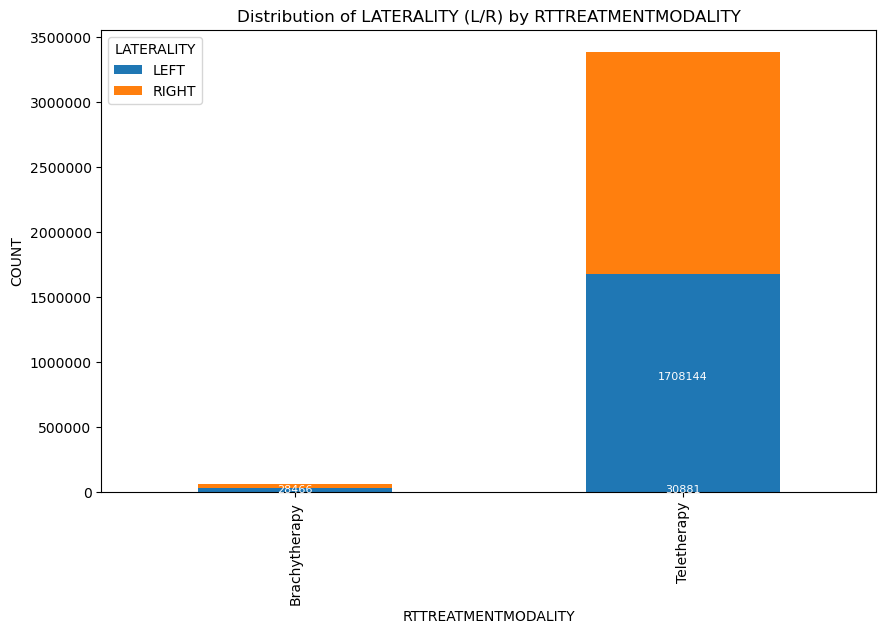

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Filter data for LATERALITY = L or R
filtered_data = merged_data[merged_data['LATERALITY'].isin(['LEFT', 'RIGHT'])]

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = filtered_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Pivot the DataFrame for plotting
pivot_data = result.pivot(index='RTTREATMENTMODALITY', columns='LATERALITY', values='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count
for i, (colname, ser) in enumerate(pivot_data.iteritems()):
    for idx, value in enumerate(ser):
        if not pd.isnull(value):
            ax.annotate(str(int(value)), (i, pivot_data.iloc[:idx][colname].sum() + value / 2),
                        ha='center', va='center', fontsize=8, color='white')

# Format y-axis as integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Distribution of LATERALITY (L/R) by RTTREATMENTMODALITY')
plt.xlabel('RTTREATMENTMODALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\4105897968.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\4105897968.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\4105897968.py:44: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (colname, ser) in enumerate(pivot_data.iteritems()):


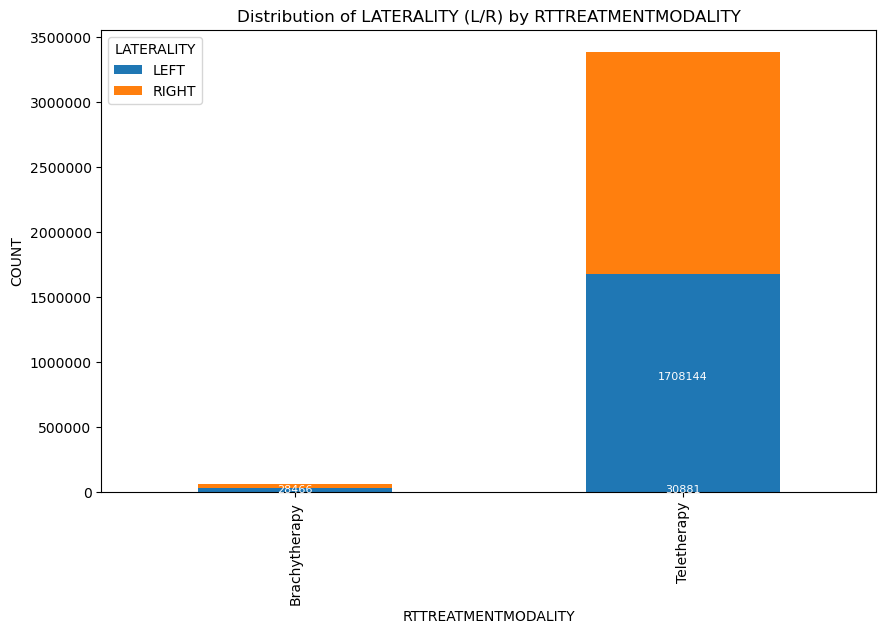

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Filter data for LATERALITY = L or R
filtered_data = merged_data[merged_data['LATERALITY'].isin(['LEFT', 'RIGHT'])]

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = filtered_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Pivot the DataFrame for plotting
pivot_data = result.pivot(index='RTTREATMENTMODALITY', columns='LATERALITY', values='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count
for i, (colname, ser) in enumerate(pivot_data.iteritems()):
    for idx, value in enumerate(ser):
        if not pd.isnull(value):
            # Adjust the y-coordinate for annotation
            y_coord = pivot_data.iloc[:idx][colname].sum() + value / 2
            ax.annotate(str(int(value)), (i, y_coord),
                        ha='center', va='center', fontsize=8, color='white')

# Format y-axis as integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Distribution of LATERALITY (L/R) by RTTREATMENTMODALITY')
plt.xlabel('RTTREATMENTMODALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\633600440.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\633600440.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\633600440.py:44: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (colname, ser) in enumerate(pivot_data.iteritems()):


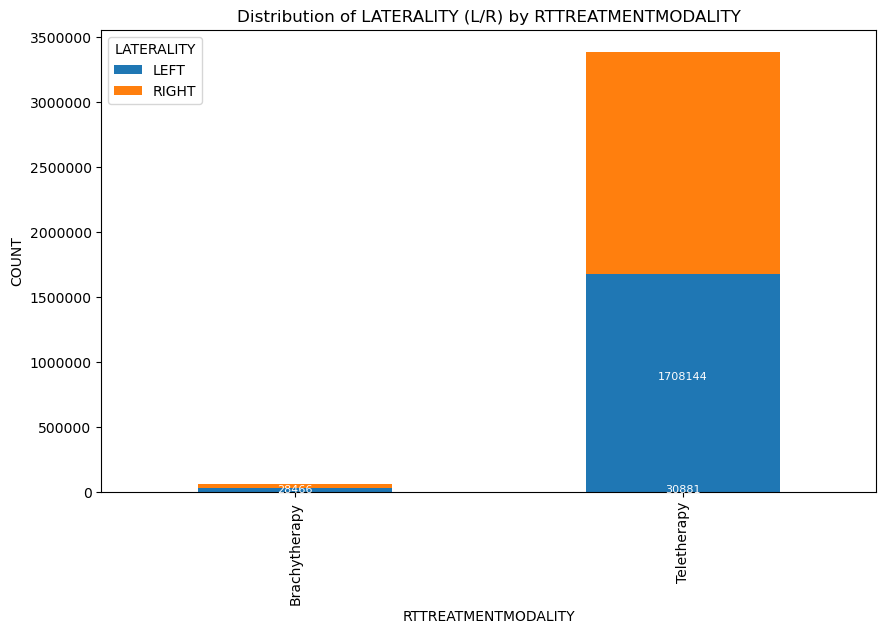

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Filter data for LATERALITY = L or R
filtered_data = merged_data[merged_data['LATERALITY'].isin(['LEFT', 'RIGHT'])]

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = filtered_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Pivot the DataFrame for plotting
pivot_data = result.pivot(index='RTTREATMENTMODALITY', columns='LATERALITY', values='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count
for i, (colname, ser) in enumerate(pivot_data.iteritems()):
    for idx, value in enumerate(ser):
        if not pd.isnull(value):
            # Adjust the y-coordinate for annotation
            bottom = pivot_data.iloc[:idx][colname].sum()
            ax.annotate(str(int(value)), (i, bottom + value / 2),
                        ha='center', va='center', fontsize=8, color='white')

# Format y-axis as integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Distribution of LATERALITY (L/R) by RTTREATMENTMODALITY')
plt.xlabel('RTTREATMENTMODALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3083839874.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3083839874.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3083839874.py:44: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (colname, ser) in enumerate(pivot_data.iteritems()):


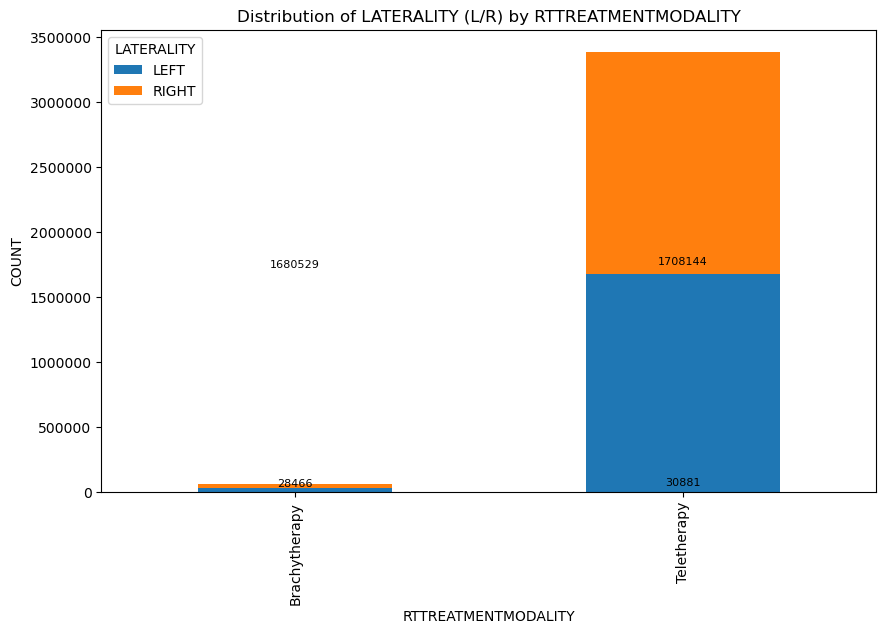

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Filter data for LATERALITY = L or R
filtered_data = merged_data[merged_data['LATERALITY'].isin(['LEFT', 'RIGHT'])]

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = filtered_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Pivot the DataFrame for plotting
pivot_data = result.pivot(index='RTTREATMENTMODALITY', columns='LATERALITY', values='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count outside the bars
for i, (colname, ser) in enumerate(pivot_data.iteritems()):
    for idx, value in enumerate(ser):
        if not pd.isnull(value):
            ax.text(i, pivot_data.iloc[:idx][colname].sum() + value + 0.1, str(int(value)),
                    ha='center', va='bottom', fontsize=8, color='black')

# Format y-axis as integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Distribution of LATERALITY (L/R) by RTTREATMENTMODALITY')
plt.xlabel('RTTREATMENTMODALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3361038185.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3361038185.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\3361038185.py:44: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (colname, ser) in enumerate(pivot_data.iteritems()):


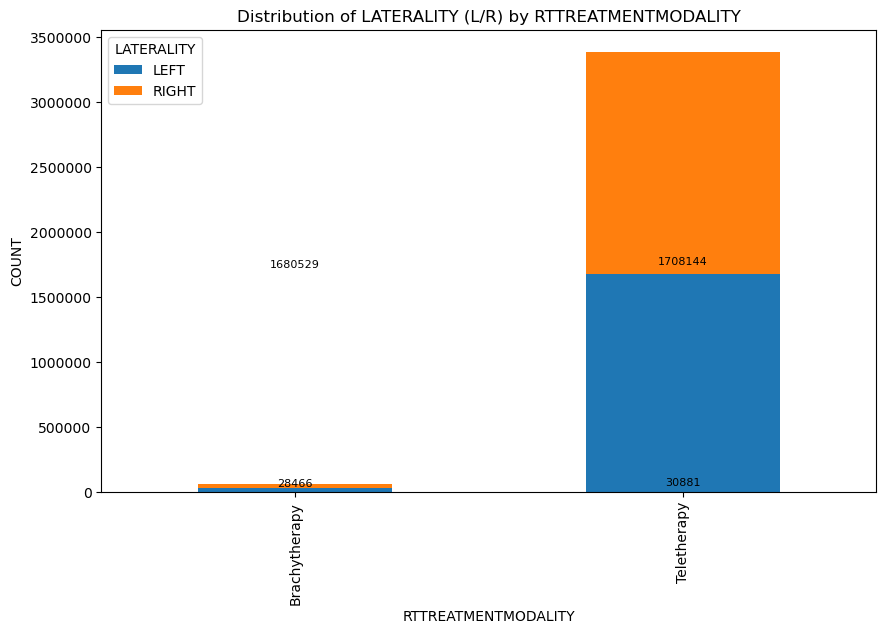

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Filter data for LATERALITY = L or R
filtered_data = merged_data[merged_data['LATERALITY'].isin(['LEFT', 'RIGHT'])]

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = filtered_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Pivot the DataFrame for plotting
pivot_data = result.pivot(index='RTTREATMENTMODALITY', columns='LATERALITY', values='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count outside the bars
for i, (colname, ser) in enumerate(pivot_data.iteritems()):
    for idx, value in enumerate(ser):
        if not pd.isnull(value):
            ax.text(i, pivot_data.iloc[:idx][colname].sum() + value + 0.1, str(int(value)),
                    ha='center', va='bottom', fontsize=8, color='black')

# Set a minimum y-axis limit to ensure proper scaling
ax.set_ylim(bottom=0)

# Format y-axis as integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Distribution of LATERALITY (L/R) by RTTREATMENTMODALITY')
plt.xlabel('RTTREATMENTMODALITY')
plt.ylabel('COUNT')
plt.show()


C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2026026014.py:5: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2026026014.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_data = pd.read_csv('sim_rtds_prescription.csv')
C:\Users\jeril\AppData\Local\Temp\ipykernel_15100\2026026014.py:44: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (colname, ser) in enumerate(pivot_data.iteritems()):


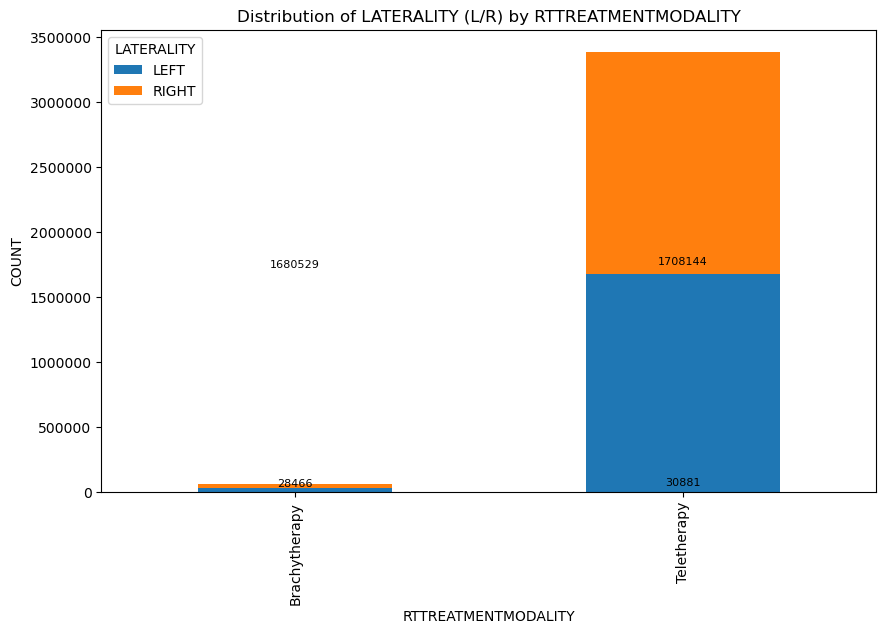

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
prescription_data = pd.read_csv('sim_rtds_prescription.csv')

# Merge datasets based on a common column
merged_data = pd.merge(tumour_data, prescription_data, on='PATIENTID', how='inner')

# Select required columns
selected_columns = ['PATIENTID', 'LATERALITY', 'RTTREATMENTMODALITY']
merged_data = merged_data[selected_columns]

# Fill NaN or null values with 0 (only for numeric columns)
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].fillna(0)

# Map 'LATERALITY' and 'RTTREATMENTMODALITY' categories
merged_data['LATERALITY'] = merged_data['LATERALITY'].map({'B': 'BILATERAL', 'L': 'LEFT', 'M': 'MIDLINE', 'R': 'RIGHT'})
merged_data['RTTREATMENTMODALITY'] = merged_data['RTTREATMENTMODALITY'].map({
    5: 'Teletherapy',
    6: 'Brachytherapy',
    1: 'External Beam Radiotherapy',
    2: 'Brachytherapy',
    3: 'Proton Therapy',
    4: 'Radioisotope Therapy',
    8: 'Other treatment'
})

# Filter data for LATERALITY = L or R
filtered_data = merged_data[merged_data['LATERALITY'].isin(['LEFT', 'RIGHT'])]

# Count the occurrences of each combination of 'RTTREATMENTMODALITY' and 'LATERALITY'
result = filtered_data.groupby(['RTTREATMENTMODALITY', 'LATERALITY']).size().reset_index(name='COUNT')

# Pivot the DataFrame for plotting
pivot_data = result.pivot(index='RTTREATMENTMODALITY', columns='LATERALITY', values='COUNT')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with the count on top of the bar
for i, (colname, ser) in enumerate(pivot_data.iteritems()):
    for idx, value in enumerate(ser):
        if not pd.isnull(value):
            ax.text(i, pivot_data.iloc[:idx][colname].sum() + value, str(int(value)),
                    ha='center', va='bottom', fontsize=8, color='black')

# Format y-axis as integers
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Distribution of LATERALITY (L/R) by RTTREATMENTMODALITY')
plt.xlabel('RTTREATMENTMODALITY')
plt.ylabel('COUNT')
plt.show()
